<a href="https://colab.research.google.com/github/Abhi-0004/Bharat-Internship/blob/main/Bharat_Internship01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bharat Internship : Business Analytics Task -1**
## **Project Name :  Forecasting the sales of a supermarket**

## Name : Chebrolu Kumaara Abhiram


## **Import the necessary libraries:**





In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA



## **Load the dataset:**


---



In [12]:
df = pd.read_csv('train.csv')


## **Perform exploratory data analysis (EDA):**


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

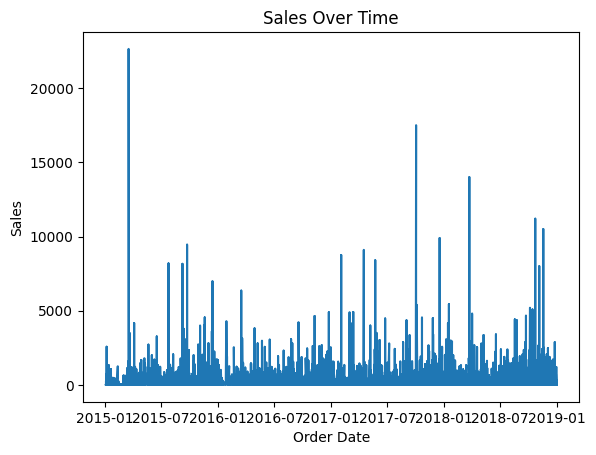

In [13]:
# Display the first few rows of the dataset
print(df.head())

# Check the data types of the columns
print(df.dtypes)

# Convert 'Order Date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Sort the dataset by 'Order Date' in ascending order
df.sort_values('Order Date', inplace=True)

# Plot the sales over time
plt.plot(df['Order Date'], df['Sales'])
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()


## **Prepare the data for forecasting:**

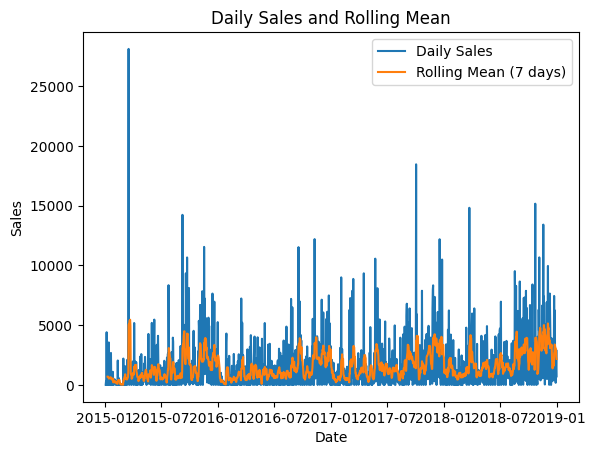

In [14]:
# Extract the relevant columns for forecasting
df_forecast = df[['Order Date', 'Sales']].copy()

# Set 'Order Date' as the index
df_forecast.set_index('Order Date', inplace=True)

# Resample the data to daily frequency and fill missing dates with 0
df_daily = df_forecast.resample('D').sum().fillna(0)

# Create a new column with the rolling mean of sales for the past 7 days
df_daily['Rolling Mean'] = df_daily['Sales'].rolling(window=7).mean()

# Plot the daily sales and rolling mean
plt.plot(df_daily.index, df_daily['Sales'], label='Daily Sales')
plt.plot(df_daily.index, df_daily['Rolling Mean'], label='Rolling Mean (7 days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales and Rolling Mean')
plt.legend()
plt.show()


## **Train the ARIMA model and make predictions:**

In [15]:
# Set the training period as the last 30 days of available data
train_end_date = df_daily.index[-31]

# Set the prediction period as the next 7 days
prediction_start_date = df_daily.index[-30]
prediction_end_date = prediction_start_date + timedelta(days=6)

# Create the training and test sets
train_data = df_daily[:train_end_date]['Sales']
test_data = df_daily[prediction_start_date:prediction_end_date]['Sales']

# Train the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions for the next 7 days
predictions = model_fit.predict(start=prediction_start_date, end=prediction_end_date)

# Print the predictions
print('Sales Predictions:')
print(predictions)


Sales Predictions:
2018-12-01    3560.489692
2018-12-02    3437.459958
2018-12-03    3432.553205
2018-12-04    3432.357510
2018-12-05    3432.349706
2018-12-06    3432.349394
2018-12-07    3432.349382
Freq: D, Name: predicted_mean, dtype: float64
